### Step 3 – Fuzzy C-means Application

1. Apply the **Fuzzy C-means** algorithm (use **c = 2**).
2. Analyze the **membership degrees** of each point to each cluster.
3. Plot the points by **color intensity** according to the membership to **Class 1** (e.g., higher intensity → higher membership).

***

### ⚙️ When to Use Fuzzy C-means (FCM)

- ✅ Use it when:
  - You expect **overlapping clusters** and want **soft assignments** (degrees of belonging).
  - Boundaries between groups are **gradual**, not crisp (e.g., transitions or mixtures).
  - You need **membership values** for downstream tasks (weights, uncertainty, interpolation).
  - Data is **continuous** and distance-based separation is meaningful.

- 🚫 Avoid it when:
  - You require **hard labels only** and overlaps are negligible (K-means may suffice).
  - Data has **strong outliers** or very **non-spherical** shapes (consider DBSCAN/OPTICS).
  - Features are **categorical** without a proper numeric embedding.
  - You can’t afford iterative membership updates on **very large datasets**.

***

### 🤖 **Model Hyperparameters**

- `c = 2` — number of clusters  
- `m = 2.0` — fuzziness coefficient (higher → softer membership)  
- `max_iter = 200` — maximum number of iterations  
- `tol = 1e-5` — convergence threshold  
- `seed = 42` — random initialization seed  

***

In [1]:
%run 00-setup.py

In [ ]:
from ml.viz import plt_fcm
from tasks.fcm import run_fcm
from ml.data import load_dataset

In [3]:
X, y, _ = load_dataset("../data/data_bivariate_gaussian.npz")

In [ ]:
res = run_fcm(X, c=2, m=2.0, max_iter=200, tol=1e-5, seed=42)

U = res["U"]
labels = res["labels"]
centers = res["centers"]

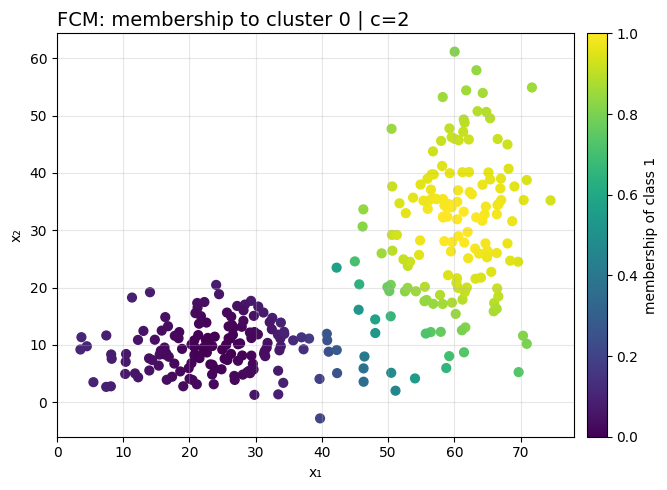

(<Figure size 700x500 with 2 Axes>,
 <Axes: title={'left': 'FCM: membership to cluster 0 | c=2'}, xlabel='x₁', ylabel='x₂'>)

In [ ]:
plt_fcm(X, U[0], title="FCM: membership to cluster 0 | c=2")

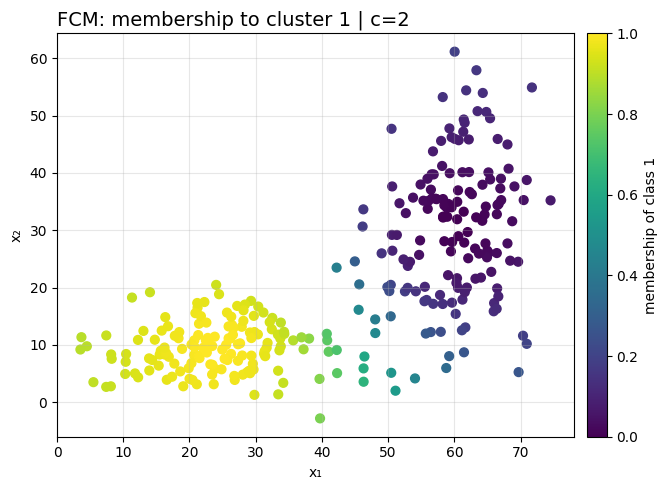

(<Figure size 700x500 with 2 Axes>,
 <Axes: title={'left': 'FCM: membership to cluster 1 | c=2'}, xlabel='x₁', ylabel='x₂'>)

In [ ]:
plt_fcm(X, U[1], title="FCM: membership to cluster 1 | c=2")

In [7]:
print("Centers:\n", centers, "\n")
print("Iterations:", res["n_iter"])

Centers:
 [[60.07332666 30.88583435]
 [24.5111101   9.79764972]] 

Iterations: 15
